## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [4]:
df = pd.read_csv('distance_dataset (1).csv', index_col = 0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


In [8]:
df.shape

(2000, 4)

In [15]:
df.describe()

,X,Y,Z,ClusterID
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.002561,5.032657,5.017639,3.000000
std,1.935367,1.956047,1.957894,1.414567
min,1.170533,1.350509,1.015867,1.000000
25%,4.544975,3.704038,3.790899,2.000000
50%,4.998504,5.081169,5.015852,3.000000
75%,5.457089,6.348823,6.345780,4.000000
max,8.983353,8.343726,8.600705,5.000000


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [7]:
mat = df[['X', 'Y', 'Z']].values
mat.shape

(2000, 3)

In [9]:
matYZ = df[['Y', 'Z']].values
matYZ.shape

(2000, 2)

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [10]:
simCosine3D = 1. - cosine_similarity(mat, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')

In [12]:
simCosine3D.shape, simCosine.shape

((2000, 1), (2000, 1))

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

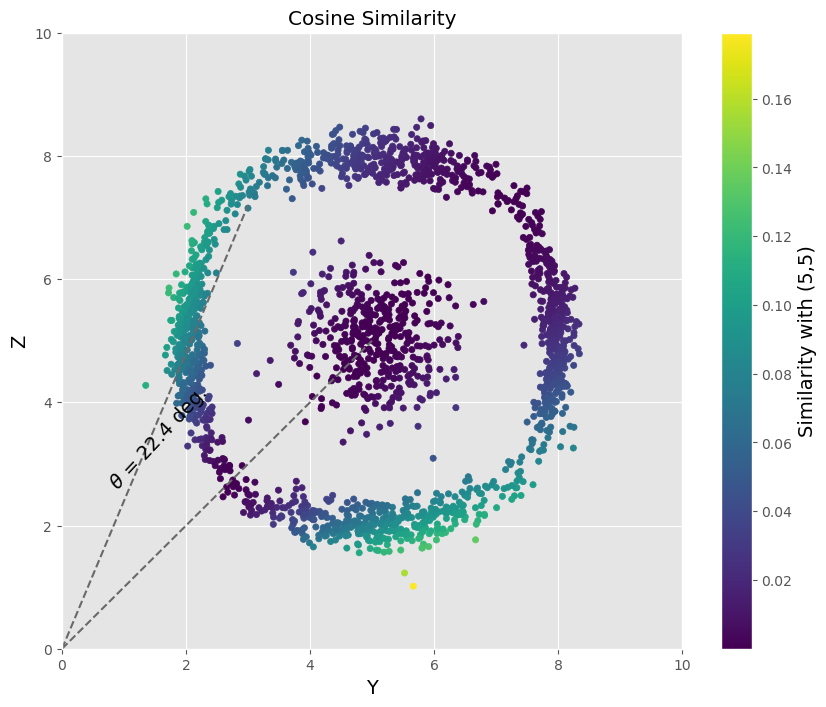

In [13]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

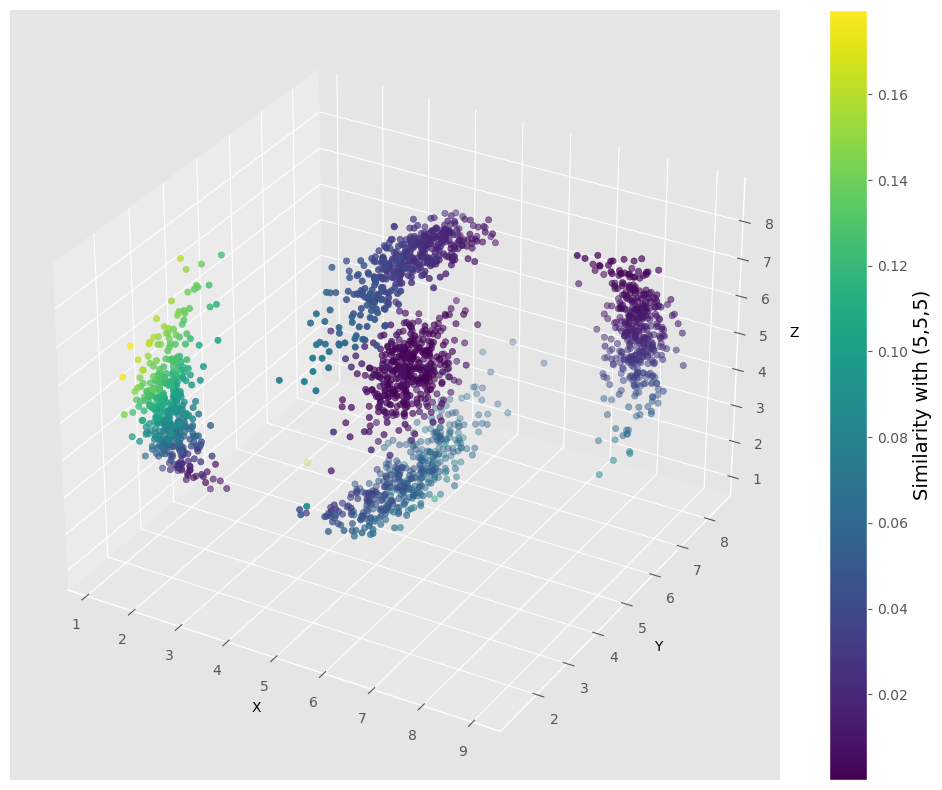

In [14]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat[:,0], mat[:,1], mat[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

**Since all points in the dataframe spread around (5, 5, 5), from statistics in describe(). Cosine similary is large overall. 1 - cosine similary is overall small in the two plots.**

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1, Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names_out(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


In [17]:
X_train_counts

<2x4 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)

pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names_out(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


In [22]:
trsfm

<2x4 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [23]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [26]:
sentence1 = 'This is a great place for friends get-together.'
sentence2 = 'I love this place for its great food and drinks.'
sentence3 = 'Service at this place is really bad.'

copus = [sentence1, sentence2, sentence3]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [27]:
cvect = CountVectorizer()
cvcopus = cvect.fit_transform(copus)
cvcopus

<3x17 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [30]:
dfcv = pd.DataFrame(cvcopus.toarray(), index = copus, columns = cvect.get_feature_names_out())
dfcv

,and,at,bad,drinks,food,for,friends,get,great,is,its,love,place,really,service,this,together
This is a great place for friends get-together.,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,1
I love this place for its great food and drinks.,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,1,0
Service at this place is really bad.,0,1,1,0,0,0,0,0,0,1,0,0,1,1,1,1,0


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [31]:
tfidfvect = TfidfVectorizer()
tfidfcopus = tfidfvect.fit_transform(copus)
tfidfcopus

<3x17 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [32]:
dftfidf = pd.DataFrame(tfidfcopus.toarray(), index = copus, columns = tfidfvect.get_feature_names_out())
dftfidf

,and,at,bad,drinks,food,for,friends,get,great,is,its,love,place,really,service,this,together
This is a great place for friends get-together.,0.000000,0.000000,0.000000,0.000000,0.000000,0.326287,0.429028,0.429028,0.326287,0.326287,0.000000,0.000000,0.253391,0.000000,0.000000,0.253391,0.429028
I love this place for its great food and drinks.,0.381956,0.000000,0.000000,0.381956,0.381956,0.290488,0.000000,0.000000,0.290488,0.000000,0.381956,0.381956,0.225589,0.000000,0.000000,0.225589,0.000000
Service at this place is really bad.,0.000000,0.435357,0.435357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331100,0.000000,0.000000,0.257129,0.435357,0.435357,0.257129,0.000000


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [33]:
cosine_similarity(tfidfcopus)

array([[1.        , 0.30388942, 0.23834197],
       [0.30388942, 1.        , 0.11601109],
       [0.23834197, 0.11601109, 1.        ]])

In [34]:
dftfidf.dot(dftfidf.iloc[0, :])

This is a great place for friends get-together.     1.000000
I love this place for its great food and drinks.    0.303889
Service at this place is really bad.                0.238342
dtype: float64

In [37]:
dftfidf.dot(dftfidf.iloc[1, :])

This is a great place for friends get-together.     0.303889
I love this place for its great food and drinks.    1.000000
Service at this place is really bad.                0.116011
dtype: float64

In [38]:
dftfidf.dot(dftfidf.iloc[2, :])

This is a great place for friends get-together.     0.238342
I love this place for its great food and drinks.    0.116011
Service at this place is really bad.                1.000000
dtype: float64

**Cosine similarity measures topic similarity. Can not fully capture sentiments in the sentence.**